In [ ]:
mischien eens kijken om campaign te combineren met duration/pdays: verschillende combinaties testen en cv op uitvoeren

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dft = pd.read_csv(r"C:\Users\basde\Documents\GitHub\Code-and-examples\Projects\Binary Classification with a Bank Dataset\train.csv")
dfo = pd.read_csv(r"C:\Users\basde\Documents\GitHub\Code-and-examples\Projects\Binary Classification with a Bank Dataset\bank-full.csv", delimiter=';')

In [3]:
dfo['y'] = dfo['y'].map({'no' : 0, 'yes': 1})


In [4]:
df = pd.concat([dft, dfo])
df = df.drop(['month', 'day', 'id'], axis=1)

In [20]:
df['y'].value_counts()

y
0    699434
1     95777
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        795211 non-null  int64 
 1   job        795211 non-null  object
 2   marital    795211 non-null  object
 3   education  795211 non-null  object
 4   default    795211 non-null  object
 5   balance    795211 non-null  int64 
 6   housing    795211 non-null  object
 7   loan       795211 non-null  object
 8   contact    795211 non-null  object
 9   day        795211 non-null  int64 
 10  month      795211 non-null  object
 11  duration   795211 non-null  int64 
 12  campaign   795211 non-null  int64 
 13  pdays      795211 non-null  int64 
 14  previous   795211 non-null  int64 
 15  poutcome   795211 non-null  object
 16  y          795211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 109.2+ MB


In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


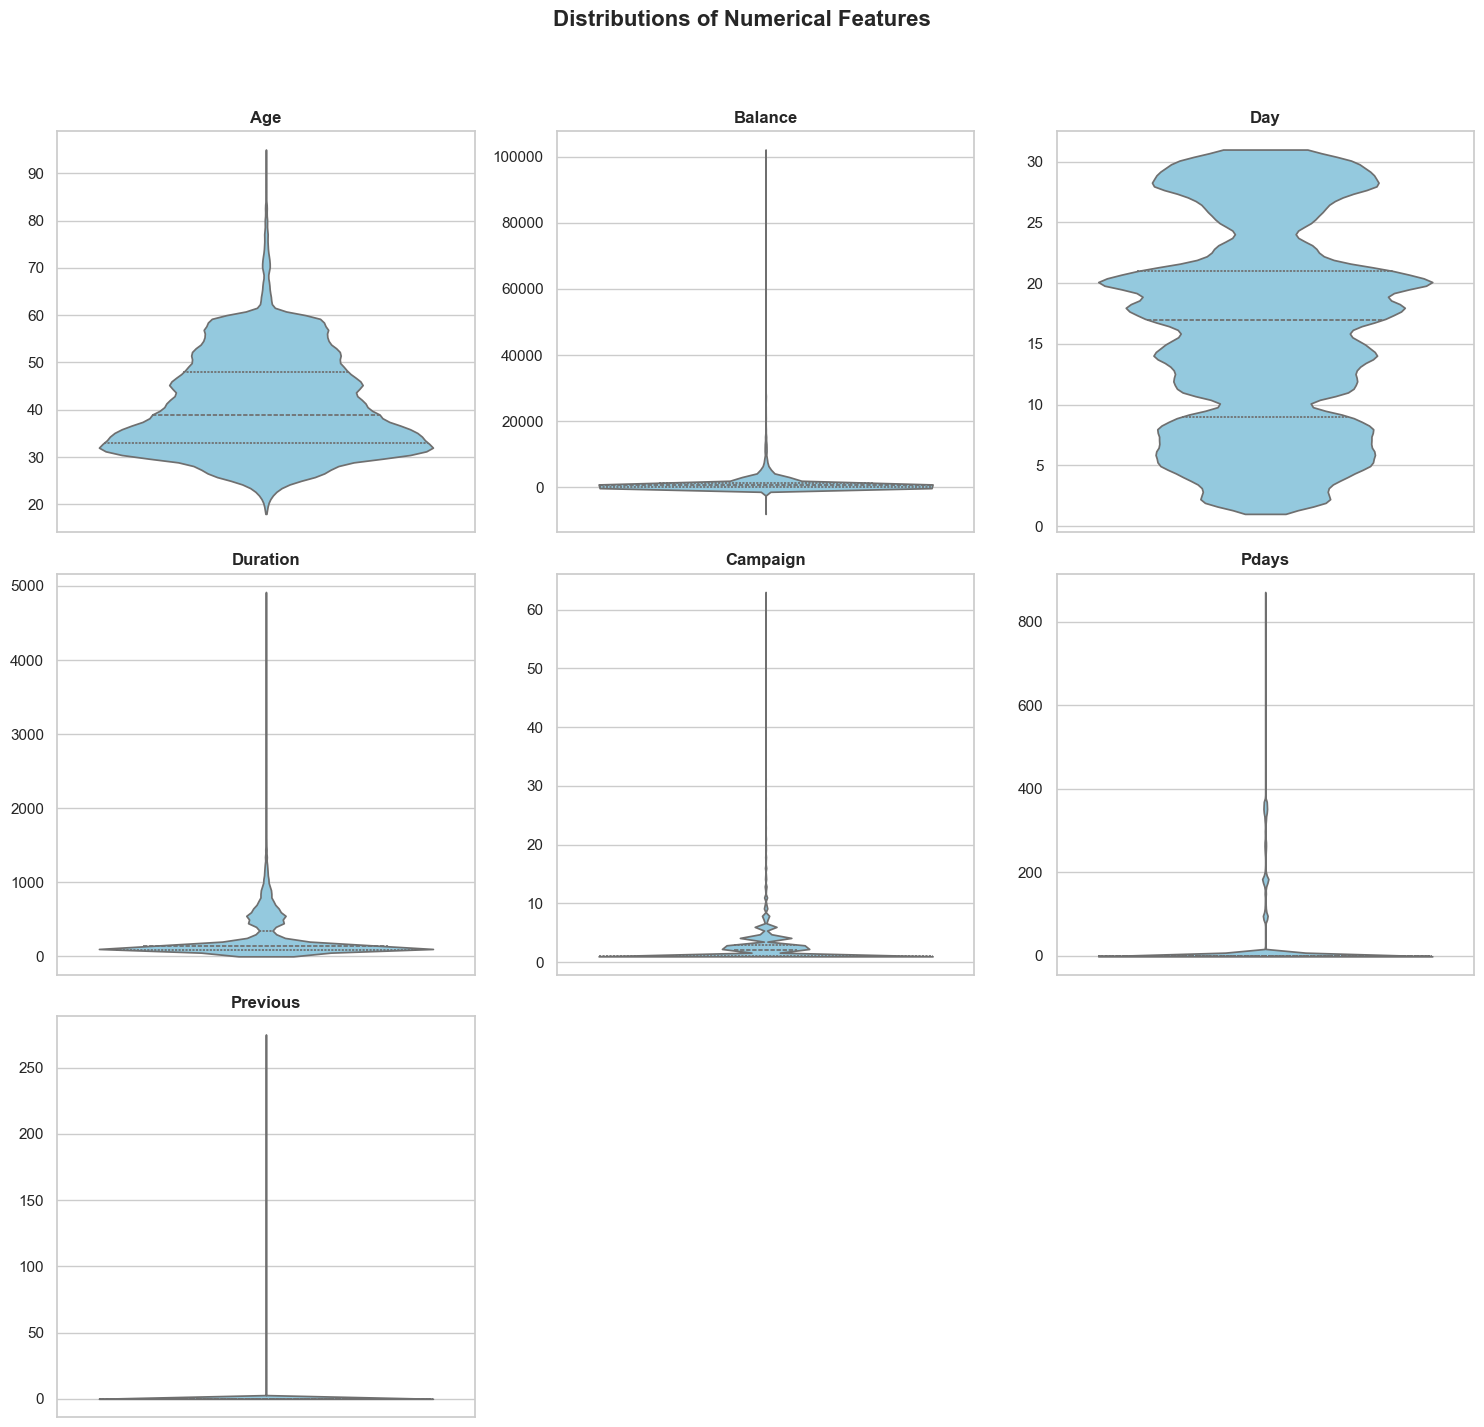

In [7]:
import math
sns.set_theme(style="whitegrid")

numeric_cols = df.select_dtypes(include=np.number).columns

if numeric_cols.empty:
    print("No numerical columns found to plot.")
else:
    n_features = len(numeric_cols)
    n_cols = 3
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Flatten the axes array for easy iteration, handling single-plot case
    if n_features > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for ax, col in zip(axes, numeric_cols):
        # Create a violin plot for each column on its respective axis
        sns.violinplot(y=df[col], ax=ax, cut=0, inner='quartile', color='skyblue')
        ax.set_title(col.replace('_', ' ').capitalize(), weight='bold')
        ax.set_ylabel('') # The y-axis is the value, no need for a label
        ax.set_xlabel('') # The x-axis has no meaning for a single violin

    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    fig.suptitle('Distributions of Numerical Features', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

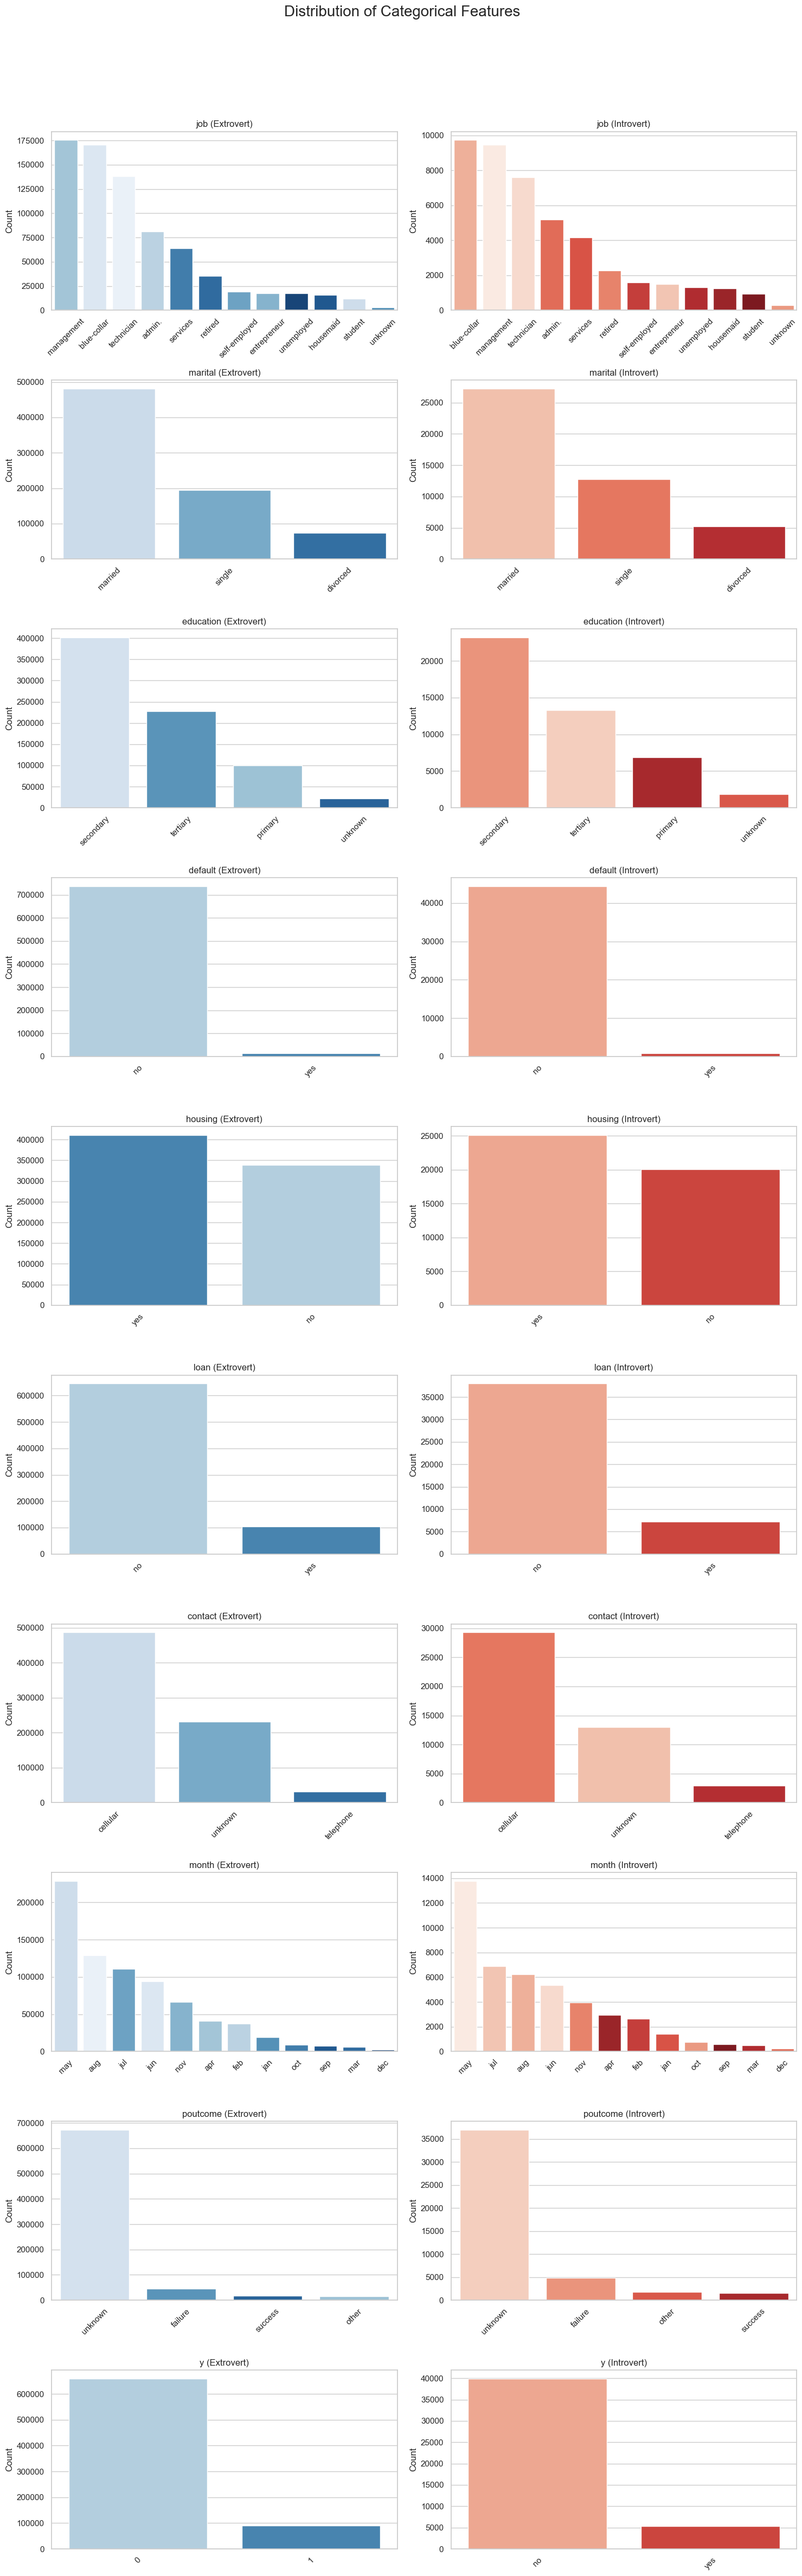

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create a figure and a grid of subplots.
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=2, figsize=(15, len(categorical_cols) * 5), squeeze=False)

# Add a main title to the entire figure
fig.suptitle('Distribution of Categorical Features', fontsize=20)

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_cols):
    # --- Left Plot: Extrovert Dataframe (dft) ---
    ax_left = axes[i, 0]
    # Handle NaN values by filling with a placeholder
    series_extrovert = dft[col].fillna('Missing')
    # Create plot order based on value counts
    order_extrovert = series_extrovert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_extrovert, ax=ax_left, hue=series_extrovert, palette="Blues", order=order_extrovert, legend=False)
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_xlabel('')
    ax_left.set_ylabel('Count')
    ax_left.tick_params(axis='x', rotation=45)

    # --- Right Plot: Introvert Dataframe (dfo) ---
    ax_right = axes[i, 1]
    # Handle NaN values by filling with a placeholder
    series_introvert = dfo[col].fillna('Missing')
    # Create plot order based on value counts
    order_introvert = series_introvert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_introvert, ax=ax_right, hue=series_introvert, palette="Reds", order=order_introvert, legend=False)
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.set_xlabel('')
    ax_right.set_ylabel('Count')
    ax_right.tick_params(axis='x', rotation=45)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

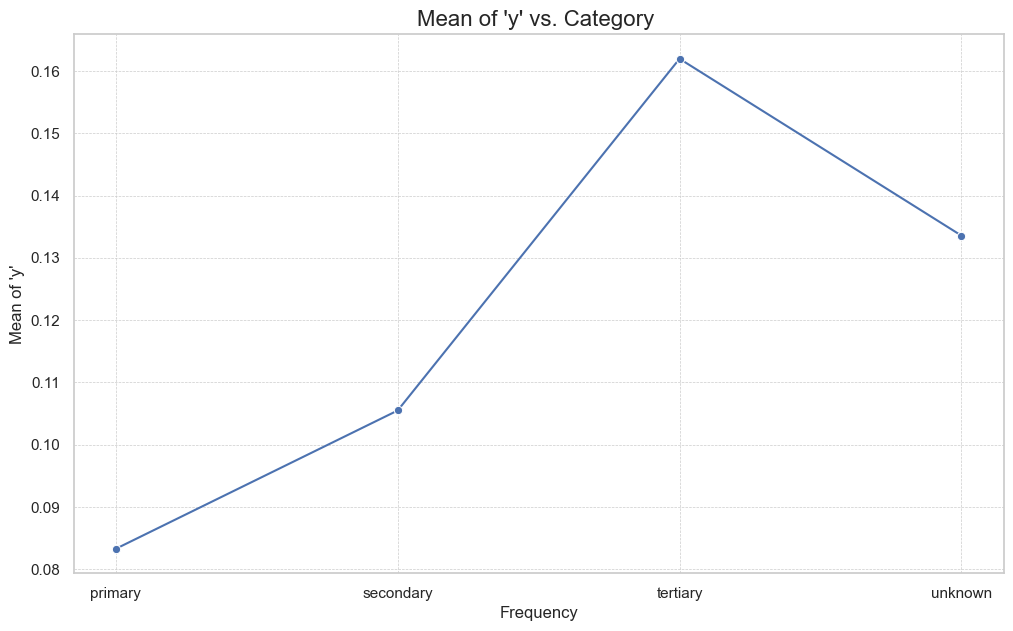

In [33]:

# Group by the calculated frequency and compute the mean of the target 'y'
# This shows the average outcome for jobs of a certain frequency
mean_y_by_group = df.groupby('education')['y'].mean()

# Plot the relationship
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_y_by_group.index, y=mean_y_by_group.values, marker='o')

plt.title("Mean of 'y' vs. Category ", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Mean of 'y'", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


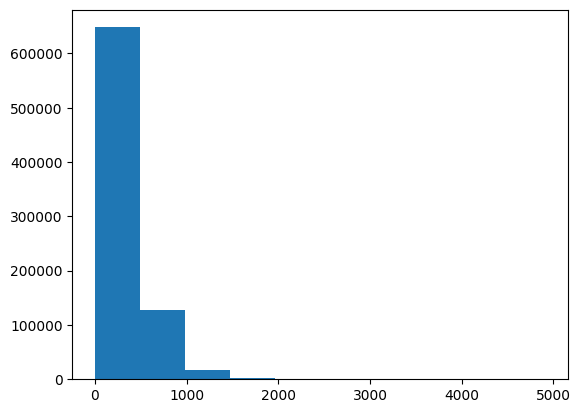

np.float64(6.978781045769387)

In [22]:
plt.hist(df['duration'])
plt.show() 
df['duration'].skew()


In [23]:
df['duration'].kurt()

np.float64(6.978781045769387)

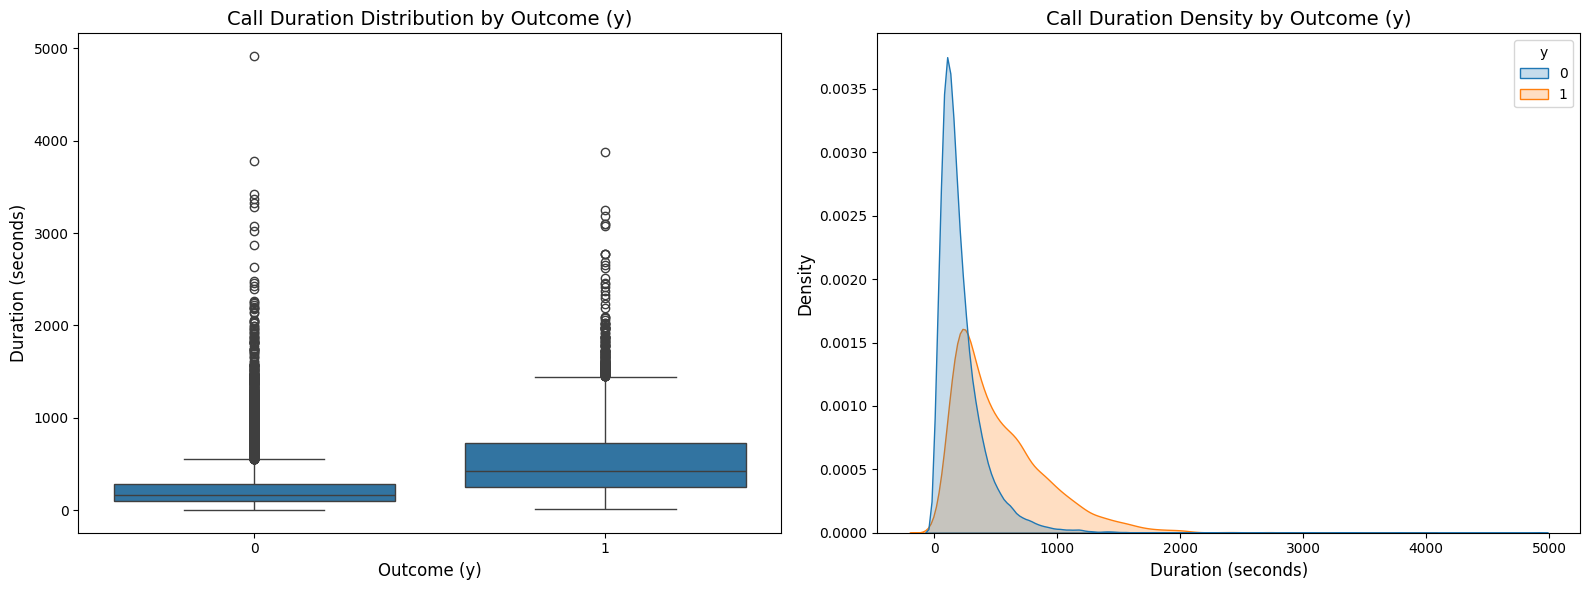

In [8]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='duration', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='duration', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

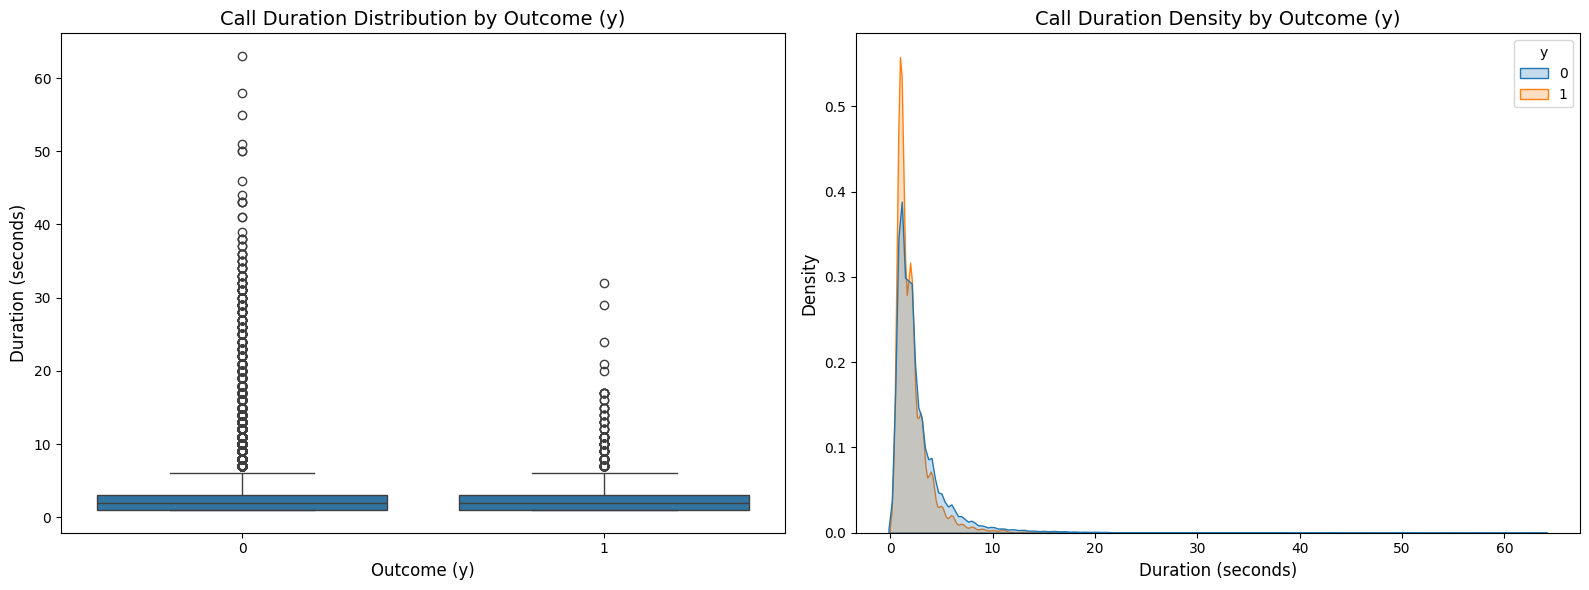

In [9]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='campaign', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='campaign', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

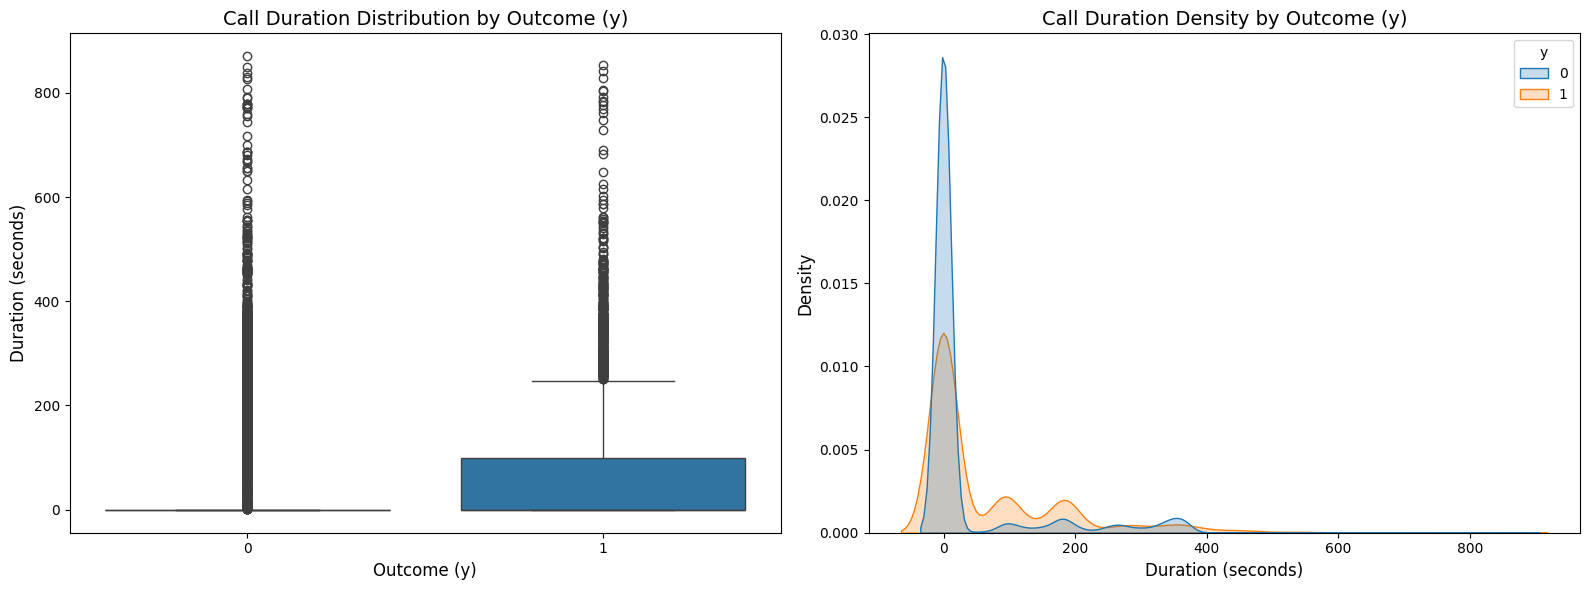

In [10]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='pdays', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='pdays', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

In [18]:
percentage = df.loc[df['pdays'] == -1, 'y'].mean() * 100

# Print the result formatted as a percentage
print(f"Percentage of 'y' being 1 when pdays = -1: {percentage:.2f}%")

Percentage of 'y' being 1 when pdays = -1: 10.14%


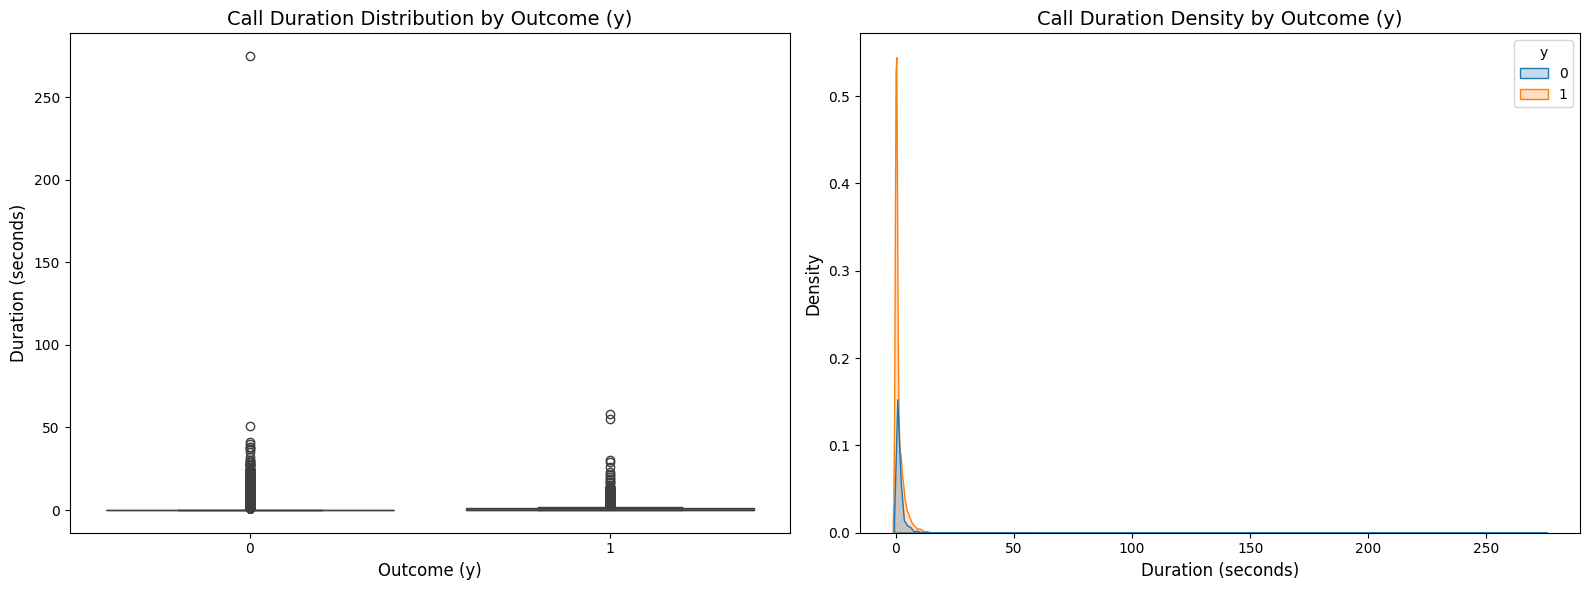

In [12]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='previous', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='previous', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(ohe.fit_transform(df[['job']]), columns=ohe.get_feature_names_out(['job']), index=df.index)
df = pd.concat([df.drop('job', axis=1), encoded_cols], axis=1)

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(ohe.fit_transform(df[['marital']]), columns=ohe.get_feature_names_out(['marital']), index=df.index)
df = pd.concat([df.drop('marital', axis=1), encoded_cols], axis=1)

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
category_order = ['primary', 'secundary', 'unkown', 'tertiary']

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit_transformd(df)

In [ ]:
df = pd.get_dummies(df['default'], drop_first=True)
df = pd.get_dummies(df['housing'], drop_first=True)
df = pd.get_dummies(df['loan'], drop_first=True)

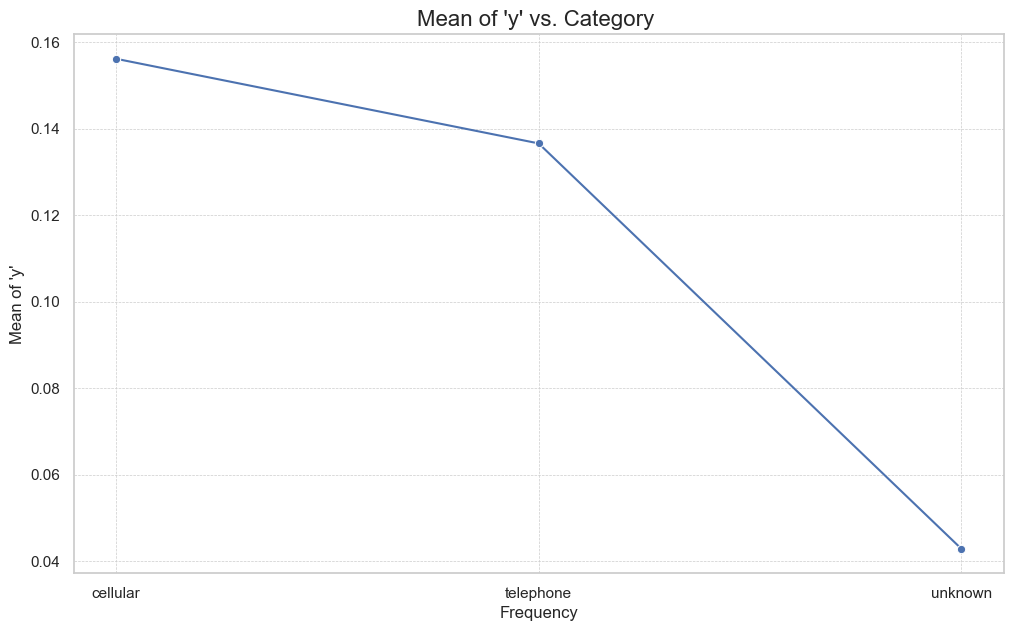

In [35]:

# Group by the calculated frequency and compute the mean of the target 'y'
# This shows the average outcome for jobs of a certain frequency
mean_y_by_group = df.groupby('contact')['y'].mean()

# Plot the relationship
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_y_by_group.index, y=mean_y_by_group.values, marker='o')

plt.title("Mean of 'y' vs. Category ", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Mean of 'y'", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
df['contact'].value_counts()

In [44]:
df = df['contact'].map({'telephone': 'cellular', 'unknown' : 'unknown', 'telephone' = 'telephone'})
pd.get_dummies(df['contact'], drop_first=True)

In [48]:
df.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, unknown to cellular
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 140.0+ bytes


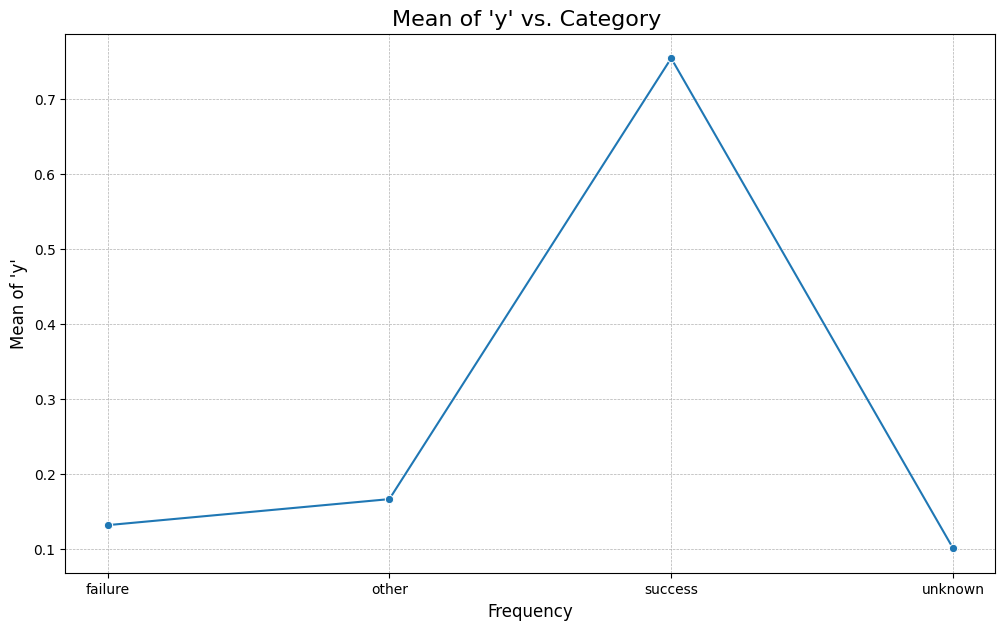

In [6]:

# Group by the calculated frequency and compute the mean of the target 'y'
# This shows the average outcome for jobs of a certain frequency
mean_y_by_group = df.groupby('poutcome')['y'].mean()

# Plot the relationship
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_y_by_group.index, y=mean_y_by_group.values, marker='o')

plt.title("Mean of 'y' vs. Category ", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Mean of 'y'", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
df['poutcome'].map({'failure': '0', 'other' : '0', 'unknown' : '0', 'succes' = '1'})